In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from collections import Counter
import  math

from sklearn.feature_selection import RFE
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn import metrics
from matplotlib import rcParams
from matplotlib import pyplot
from xgboost import plot_importance
from numpy import sort
from numpy import loadtxt
from sklearn.feature_selection import SelectFromModel
from sklearn.feature_selection import RFE


In [3]:
cnv_types = ['loss','gain']
for cnv_type in cnv_types:
    data_train_fn = './data_annotsv/train_val_test_sets/train_val_test_sets_AnnotSV/x_train_' + cnv_type + '.tsv'
    data = pd.read_csv(data_train_fn, sep='\t')

In [56]:
ATTRIBUTES = list(data.select_dtypes(include=np.number).columns.tolist())
ATTRIBUTES.remove('clinsig_bin')
len(ATTRIBUTES)

58

In [7]:
ATTRIBUTES = [
 'misZ_ExAC',
 'pLI_ExAC',
 'CGscore_indel_gene_count_2',
 'CGscore_indel_gene_count',
 'TriS_CGscore',
 'synZ_ExAC',
 'HI_CGscore',
 'gene_count',
 'promoters_count',
 'min_D_Frequency_3',
 'DGV_LOSS_Frequency',
 'HI_DDDpercent',
 'IMH_AF',
 'length',
 'morbidGene_count',
 '1000g_AF',
 '1000g_max_AF',
 'GD_POPMAX_AF',
 'GD_AF',
 'ExAC_zScore_pLI',
 'cnvZ_ExAC',
 'delZ_ExAC',
 'dupZ_ExAC',
 'DGV_LOSS_n_samples_tested',
 'ExAC_zScore_indel',
 'ExAc_zScore_cnv',
#  'Unnamed: 0',
#  'Unnamed: 0.1',
 'DGV_GAIN_Frequency',
 'min_D_Frequency_2',
 'DGV_LOSS_n_samples_with_SV',
 'id',
 'DGV_GAIN_n_samples_tested',
#  'start_grch37',
#  'stop_ncbi36',
#  'SV_start',
 'HI_DDDperc_haploinsufficient_gene_count',
 'DGV_GAIN_n_samples_with_SV',
#  'stop_grch37',
#  'start_ncbi36',
#  'SV_end'
]
    

In [2]:
def y_clinSign(clinSign_name):
    if clinSign_name == 'Pathogenic':
        return 1
    else:
        return 0
    
# data['clinsig_bin'] = data.clinsig.apply(y_clinSign)


Porovnanie na zaklade point biserial coeficientu - full-train_set

/home/gaziova/miniconda3/envs/notebookProjects/lib/python3.7/site-packages/scipy/stats/stats.py:3845: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/home/gaziova/miniconda3/envs/notebookProjects/lib/python3.7/site-packages/scipy/stats/stats.py:3845: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/home/gaziova/miniconda3/envs/notebookProjects/lib/python3.7/site-packages/scipy/stats/stats.py:3845: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())


  agg_filter: a filter function, which takes a (m, n, 3) float array and a dpi value, and returns a (m, n, 3) array
  alpha: float or None
  animated: bool
  backgroundcolor: color
  bbox: dict with properties for `.patches.FancyBboxPatch`
  clip_box: `.Bbox`
  clip_on: bool
  clip_path: Patch or (Path, Transform) or None
  color or c: color
  contains: unknown
  figure: `.Figure`
  fontfamily or family: {FONTNAME, 'serif', 'sans-serif', 'cursive', 'fantasy', 'monospace'}
  fontproperties or font or font_properties: `.font_manager.FontProperties` or `str` or `pathlib.Path`
  fontsize or size: float or {'xx-small', 'x-small', 'small', 'medium', 'large', 'x-large', 'xx-large'}
  fontstretch or stretch: {a numeric value in range 0-1000, 'ultra-condensed', 'extra-condensed', 'condensed', 'semi-condensed', 'normal', 'semi-expanded', 'expanded', 'extra-expanded', 'ultra-expanded'}
  fontstyle or style: {'normal', 'italic', 'oblique'}
  fontvariant or variant: {'normal', 'small-caps'}
  fontw

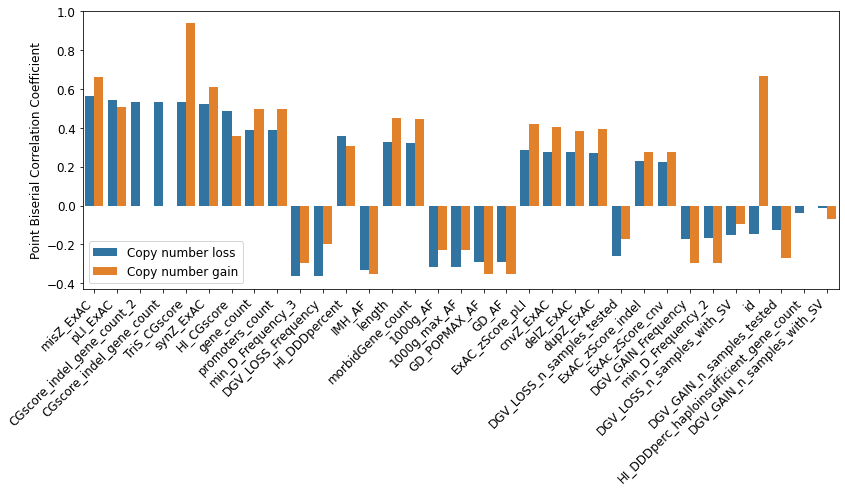

In [60]:

cnv_types = ['loss', 'gain']
for cnv_type in cnv_types:
    data_train_fn = './data_annotsv/train_val_test_sets/train_val_test_sets_AnnotSV/train_val_test_sets_AnnotSV/x_train_' + cnv_type + '.tsv'
    data = pd.read_csv(data_train_fn, sep='\t')

    biserial_correlation_clinsig_cnv_specific = pd.DataFrame()
    i=0
#     ATTRIBUTES = list(data.select_dtypes(include=np.number).columns.tolist())
#     ATTRIBUTES.remove('clinsig_bin')
    
    for atr in ATTRIBUTES:
        data_to_corr = data[['clinsig_bin', atr]]
        data_to_corr = data_to_corr.dropna()
        if data_to_corr.shape[0] > 0:
            korelacia = stats.pointbiserialr(data_to_corr['clinsig_bin'], data_to_corr[atr]).correlation
            biserial_correlation_clinsig_cnv_specific.at[i, 'PointBiserialCoefficient'] = korelacia
            biserial_correlation_clinsig_cnv_specific.at[i, 'AttributeName'] = atr
            i+=1

    biserial_correlation_clinsig_cnv_specific = biserial_correlation_clinsig_cnv_specific.reindex(biserial_correlation_clinsig_cnv_specific.PointBiserialCoefficient.abs().sort_values(ascending=False).index)

    biserial_correlation_clinsig_cnv_specific_fn = './results_isv_annotsv/comparison_attributes_annotsv_full/correlations_attributes/pointBiserialCorrelation_reduced_attributes_'+ cnv_type +'.tsv'
    biserial_correlation_clinsig_cnv_specific.to_csv(biserial_correlation_clinsig_cnv_specific_fn, sep='\t', index=False)


loss_biserial_correlation_clinsig_cnv_specific = pd.read_csv('./results_isv_annotsv/comparison_attributes_annotsv_full/correlations_attributes/pointBiserialCorrelation_reduced_attributes_loss.tsv', sep='\t')
gain_biserial_correlation_clinsig_cnv_specific = pd.read_csv('./results_isv_annotsv/comparison_attributes_annotsv_full/correlations_attributes/pointBiserialCorrelation_reduced_attributes_gain.tsv', sep='\t')

loss_biserial_correlation_clinsig_cnv_specific['CNV_type'] = 'Copy number loss'
gain_biserial_correlation_clinsig_cnv_specific['CNV_type'] = 'Copy number gain'

pcb = pd.concat([loss_biserial_correlation_clinsig_cnv_specific, gain_biserial_correlation_clinsig_cnv_specific])

rcParams.update({'font.size': 12})
fig, ax = plt.subplots(figsize=(12, 7))
sns.barplot(x='AttributeName', y='PointBiserialCoefficient', data = pcb, hue='CNV_type')
plt.setp(ax.get_xticklabels(), rotation=45, ha='right')
plt.setp(ax.set_xlabel(''))
plt.setp(ax.legend(title=None) )
plt.setp(ax.set_ylabel('Point Biserial Correlation Coefficient'))
fig.tight_layout()
fn_to_savefig = './results_isv_annotsv/comparison_attributes_annotsv_full/correlations_attributes/pointBiserialCorrelation_loss_gain_reduced_barplot.jpg'
plt.savefig(fn_to_savefig, dpi=350, format='jpg', bbox_inches = 'tight', facecolor='white')
plt.show()

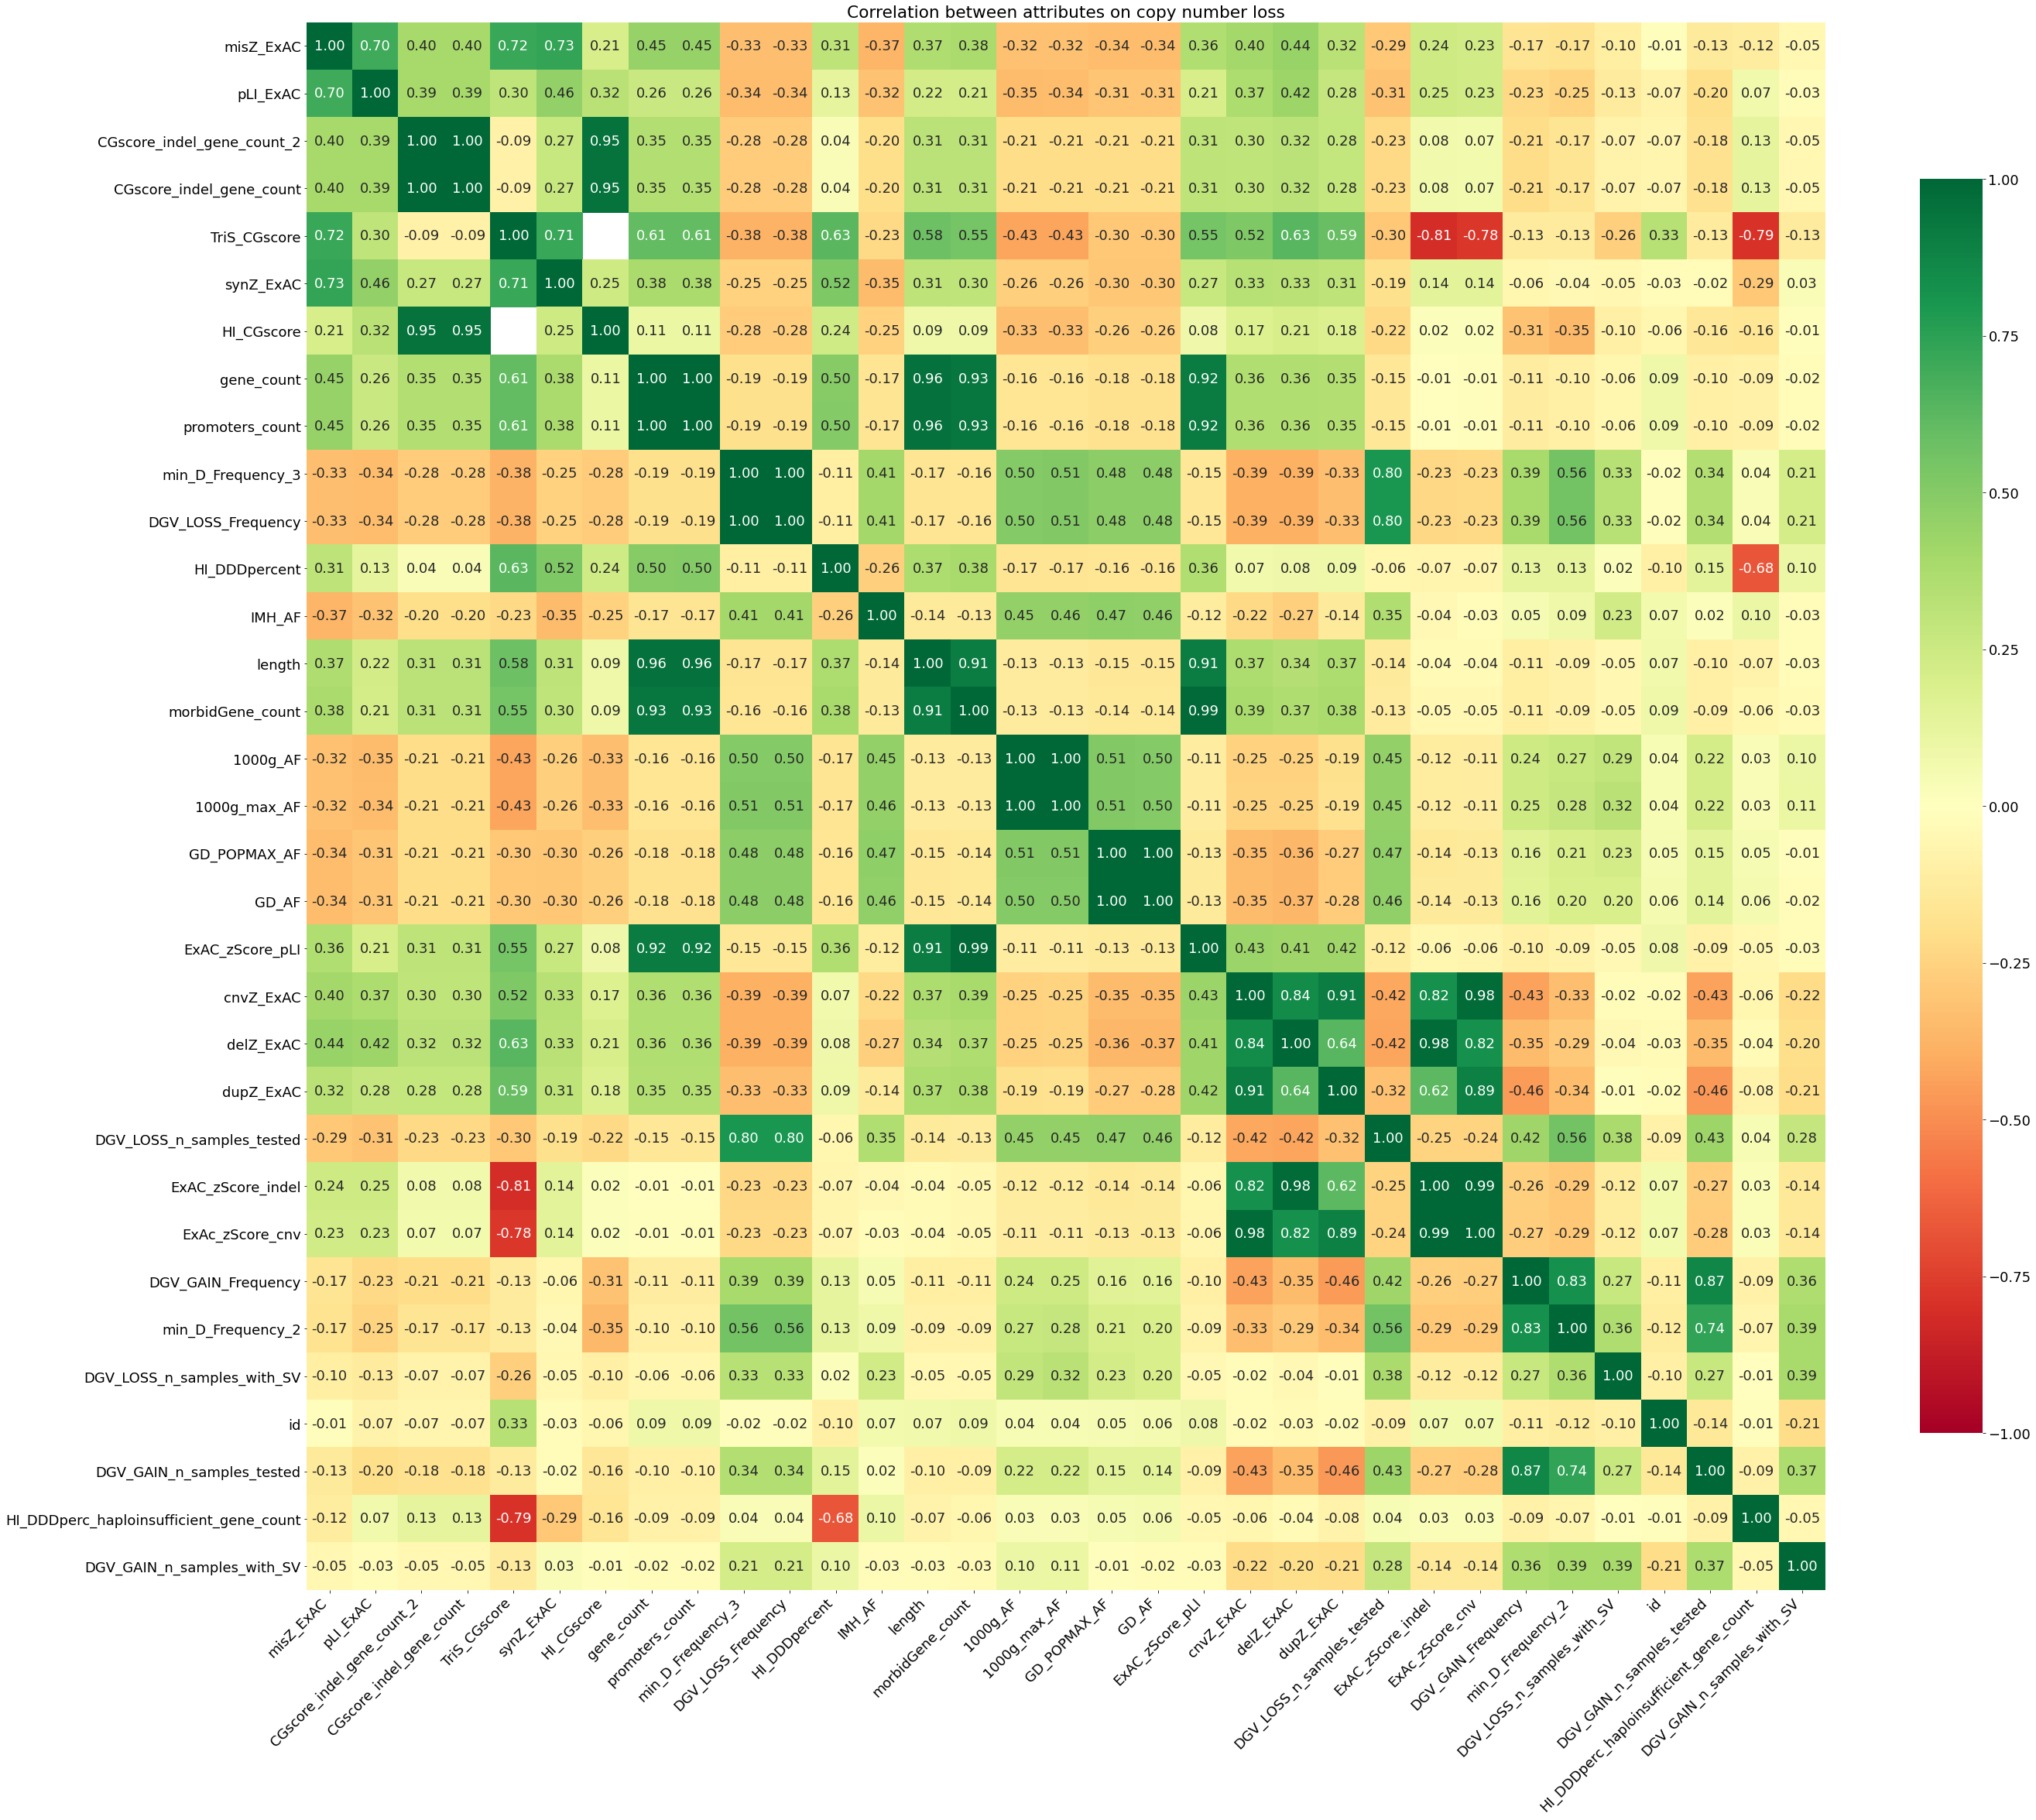

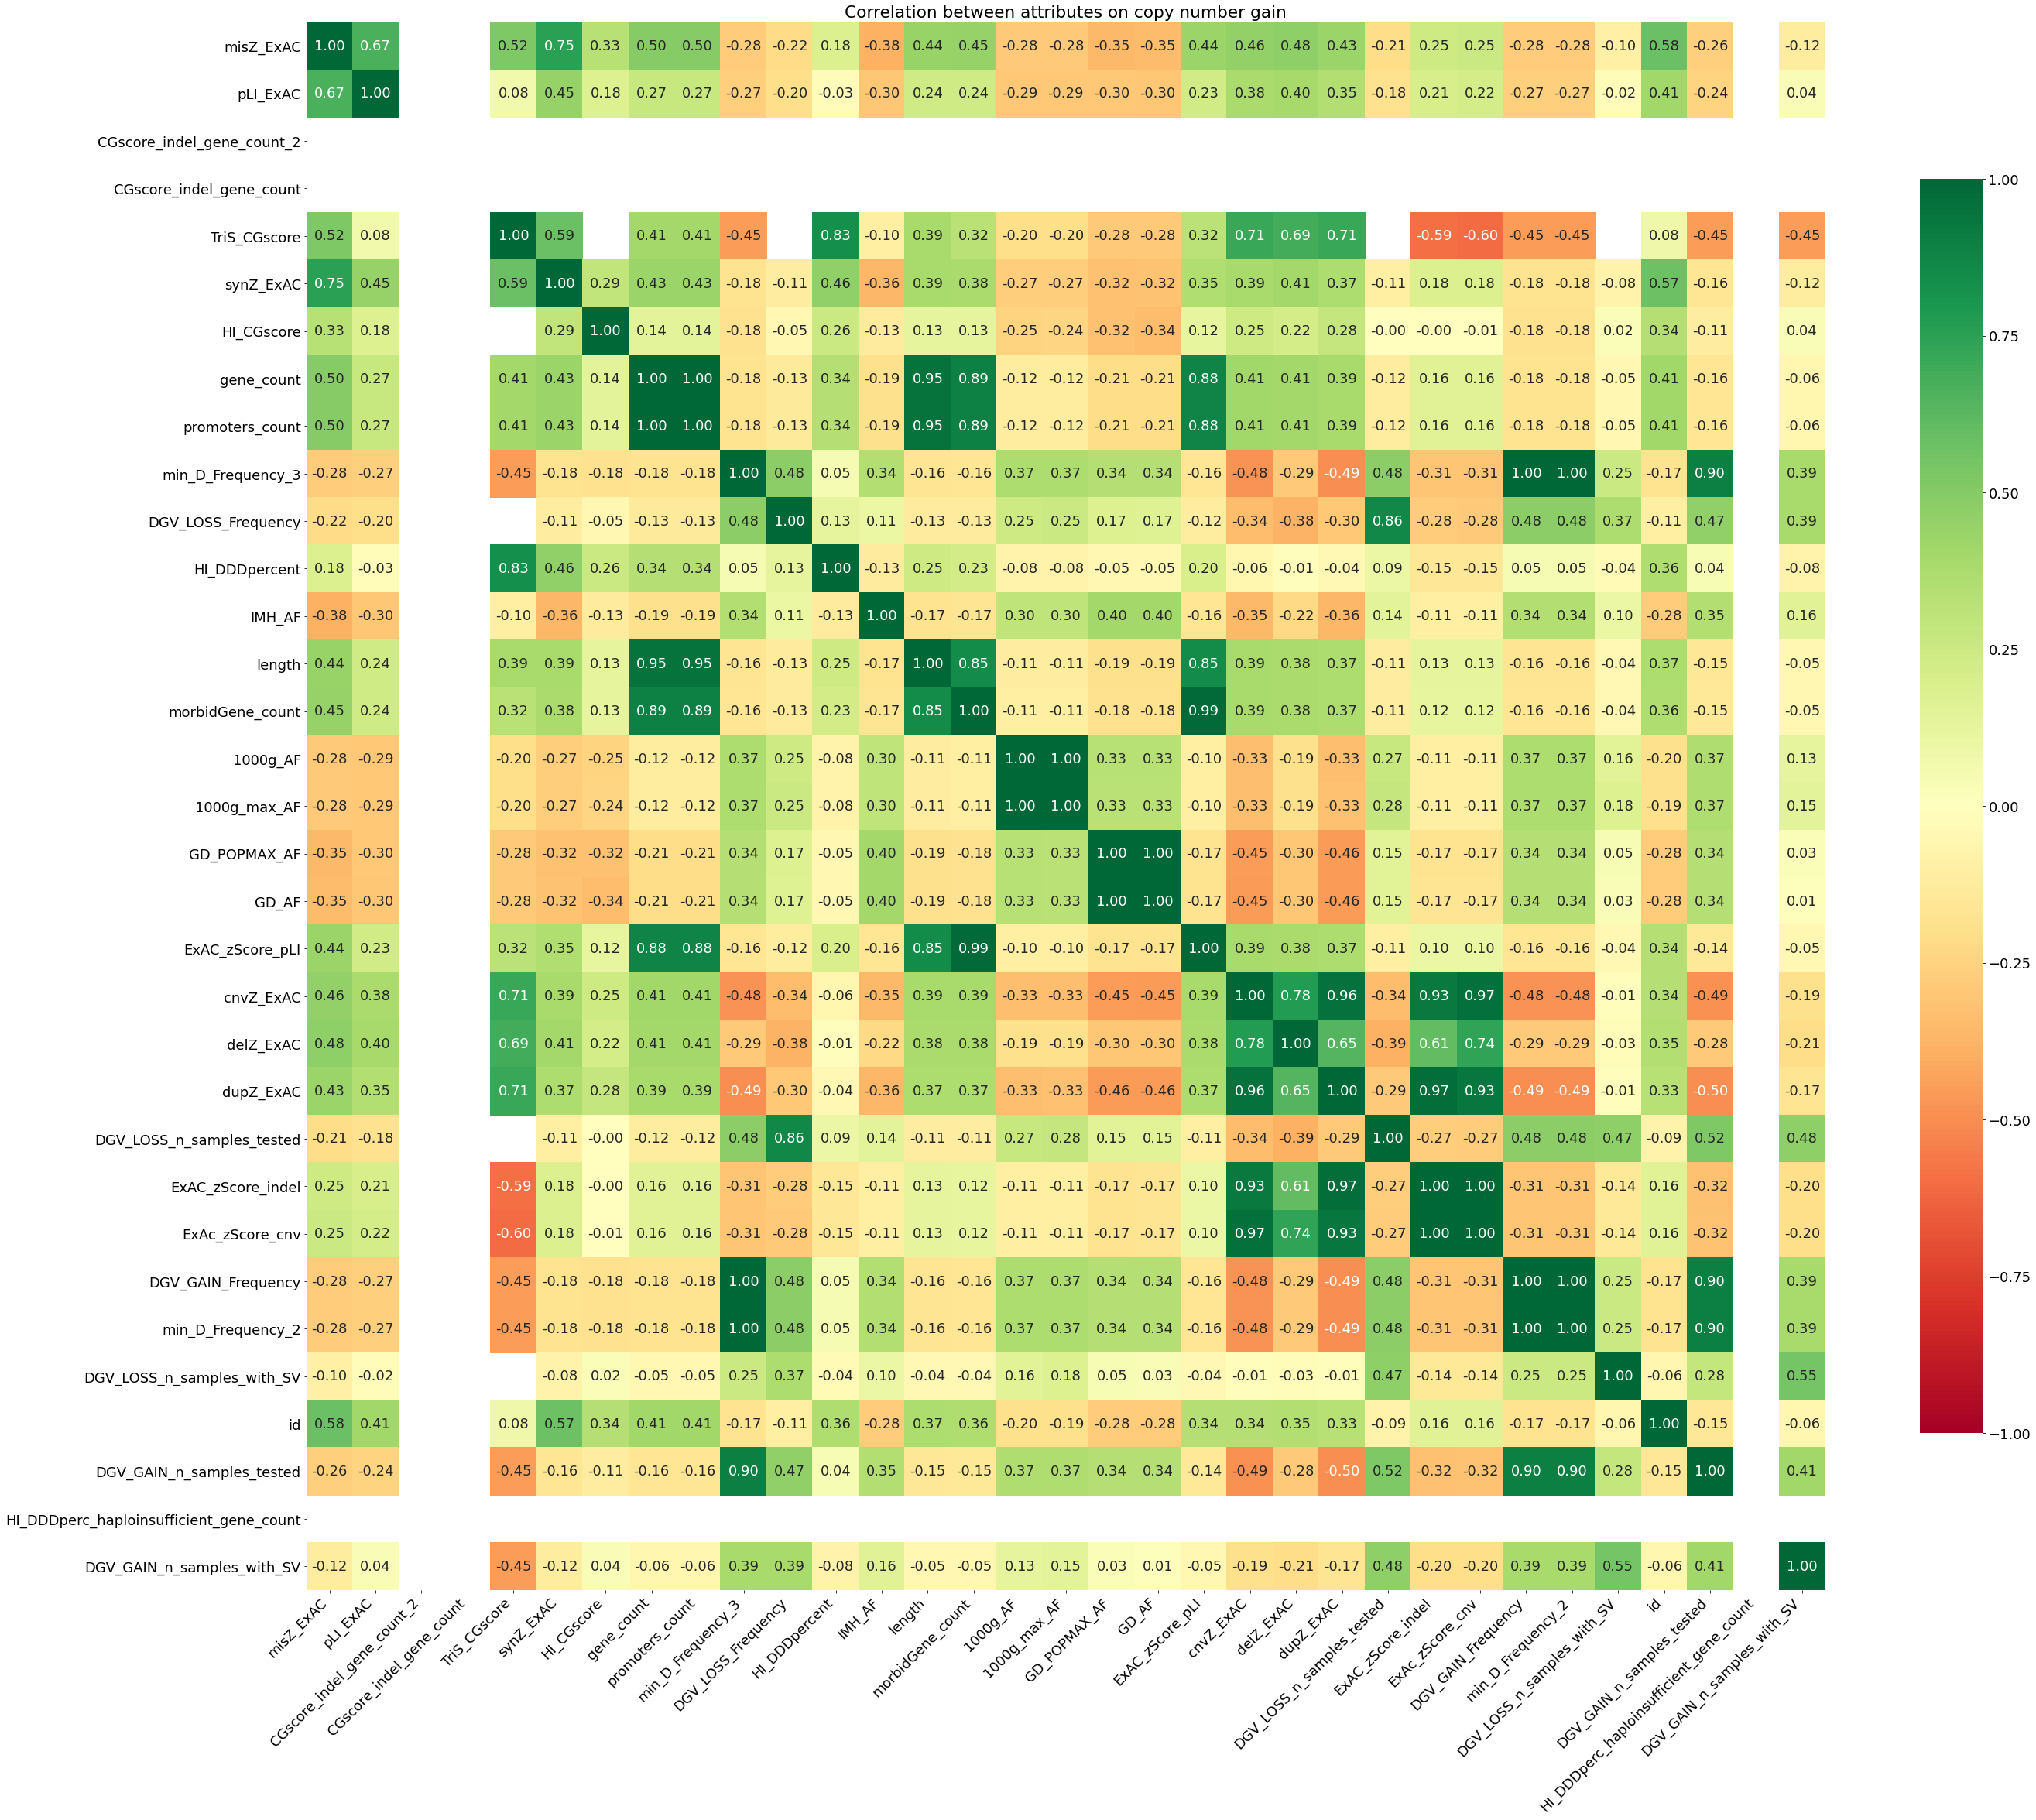

In [61]:

cnv_types = ['loss','gain']
for cnv_type in cnv_types:
    data_train_fn = './data_annotsv/train_val_test_sets/train_val_test_sets_AnnotSV/x_train_' + cnv_type + '.tsv'
    data = pd.read_csv(data_train_fn, sep='\t')
    data_to_correlate = data[ATTRIBUTES]
    method='pearson' # ‘pearson’, ‘kendall’, ‘spearman’
    korelacie = data_to_correlate.corr(method=method)
    
    # korelacie
    rcParams.update({'font.size': 18})
    fig, ax = plt.subplots(figsize=(40, 33))
    # plt.figure()    
    res = sns.heatmap(korelacie, cmap="RdYlGn", annot=True, fmt='.2f',cbar_kws={"shrink": 0.8}, vmin=-1, vmax=1)  #, linewidths=0.05, linecolor='gray')
    plt.setp(ax.get_xticklabels(), rotation=45, ha='right')

    res.set_xticklabels(res.get_xmajorticklabels())
    res.set_yticklabels(res.get_ymajorticklabels())
    title_text = 'Correlation between attributes on copy number ' + cnv_type
    plt.title(title_text)
    fig.tight_layout()
    fn_to_savefig = './results_isv_annotsv/comparison_attributes_annotsv_full/correlations_attributes/corr_'+ method + 'cnv_specific_attributes_' + cnv_type +'_heatmap.jpg'
    plt.savefig(fn_to_savefig, dpi=350, format='jpg', bbox_inches = 'tight', facecolor='white')
    plt.show()

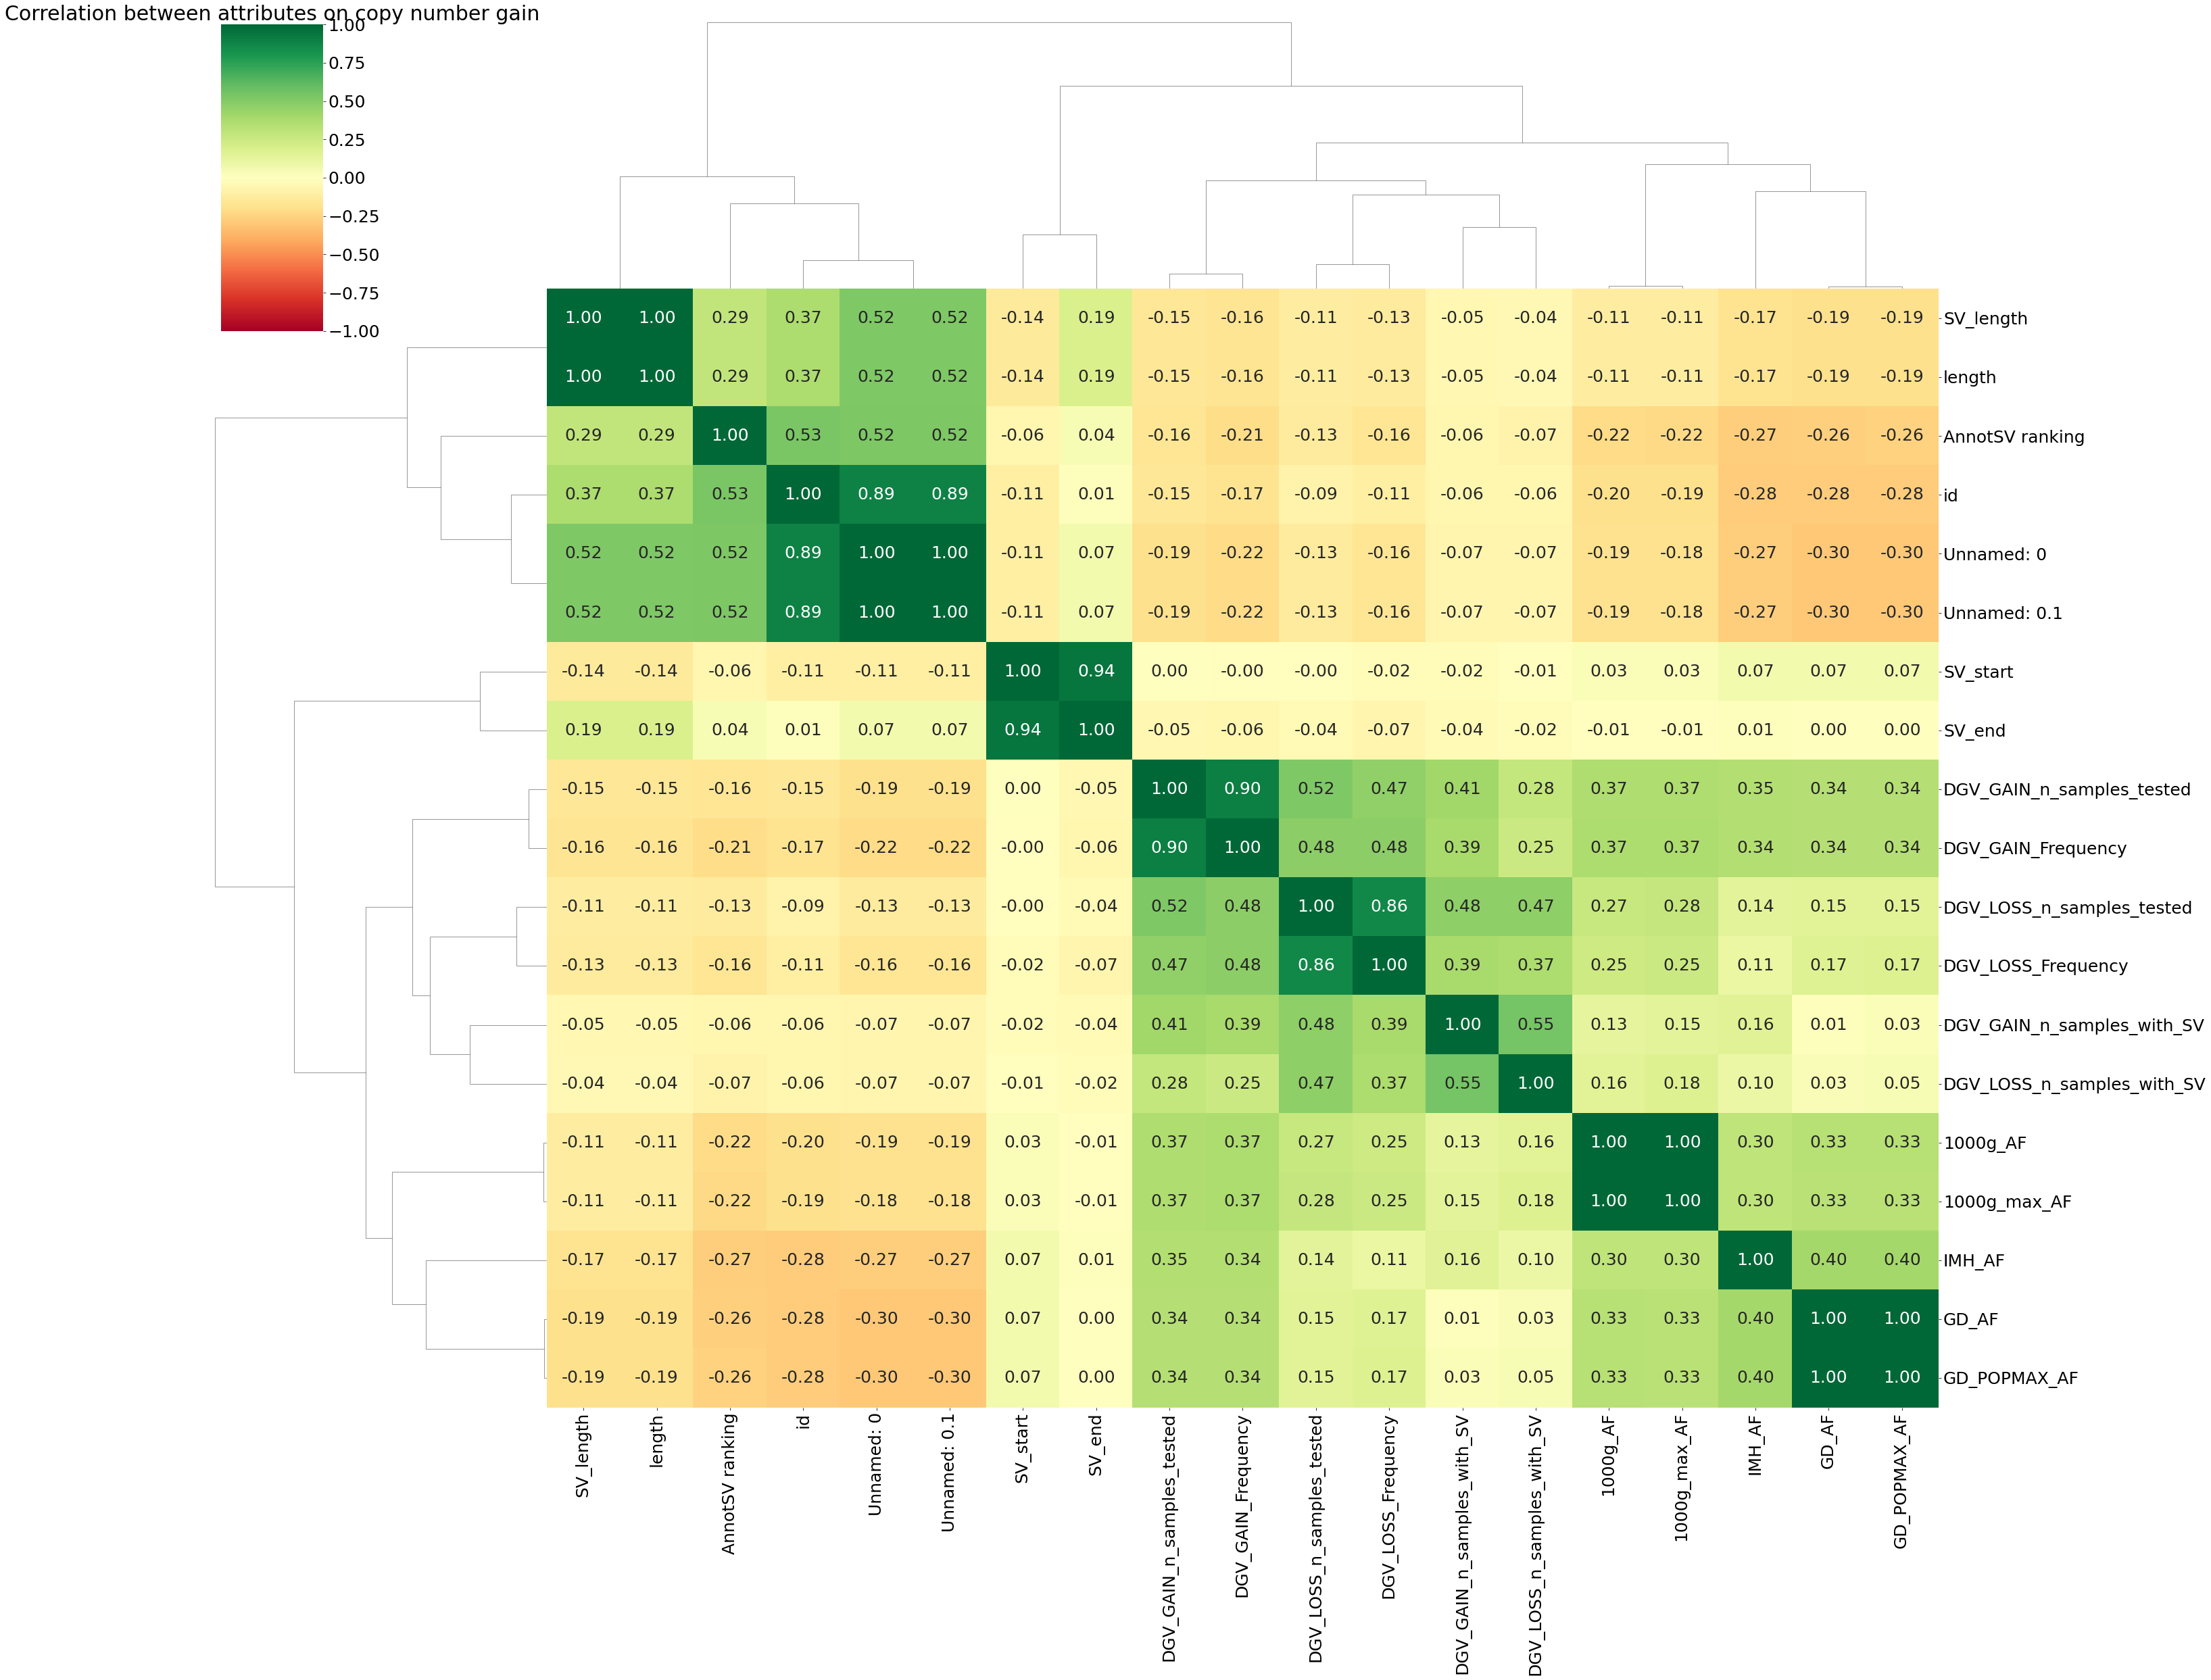

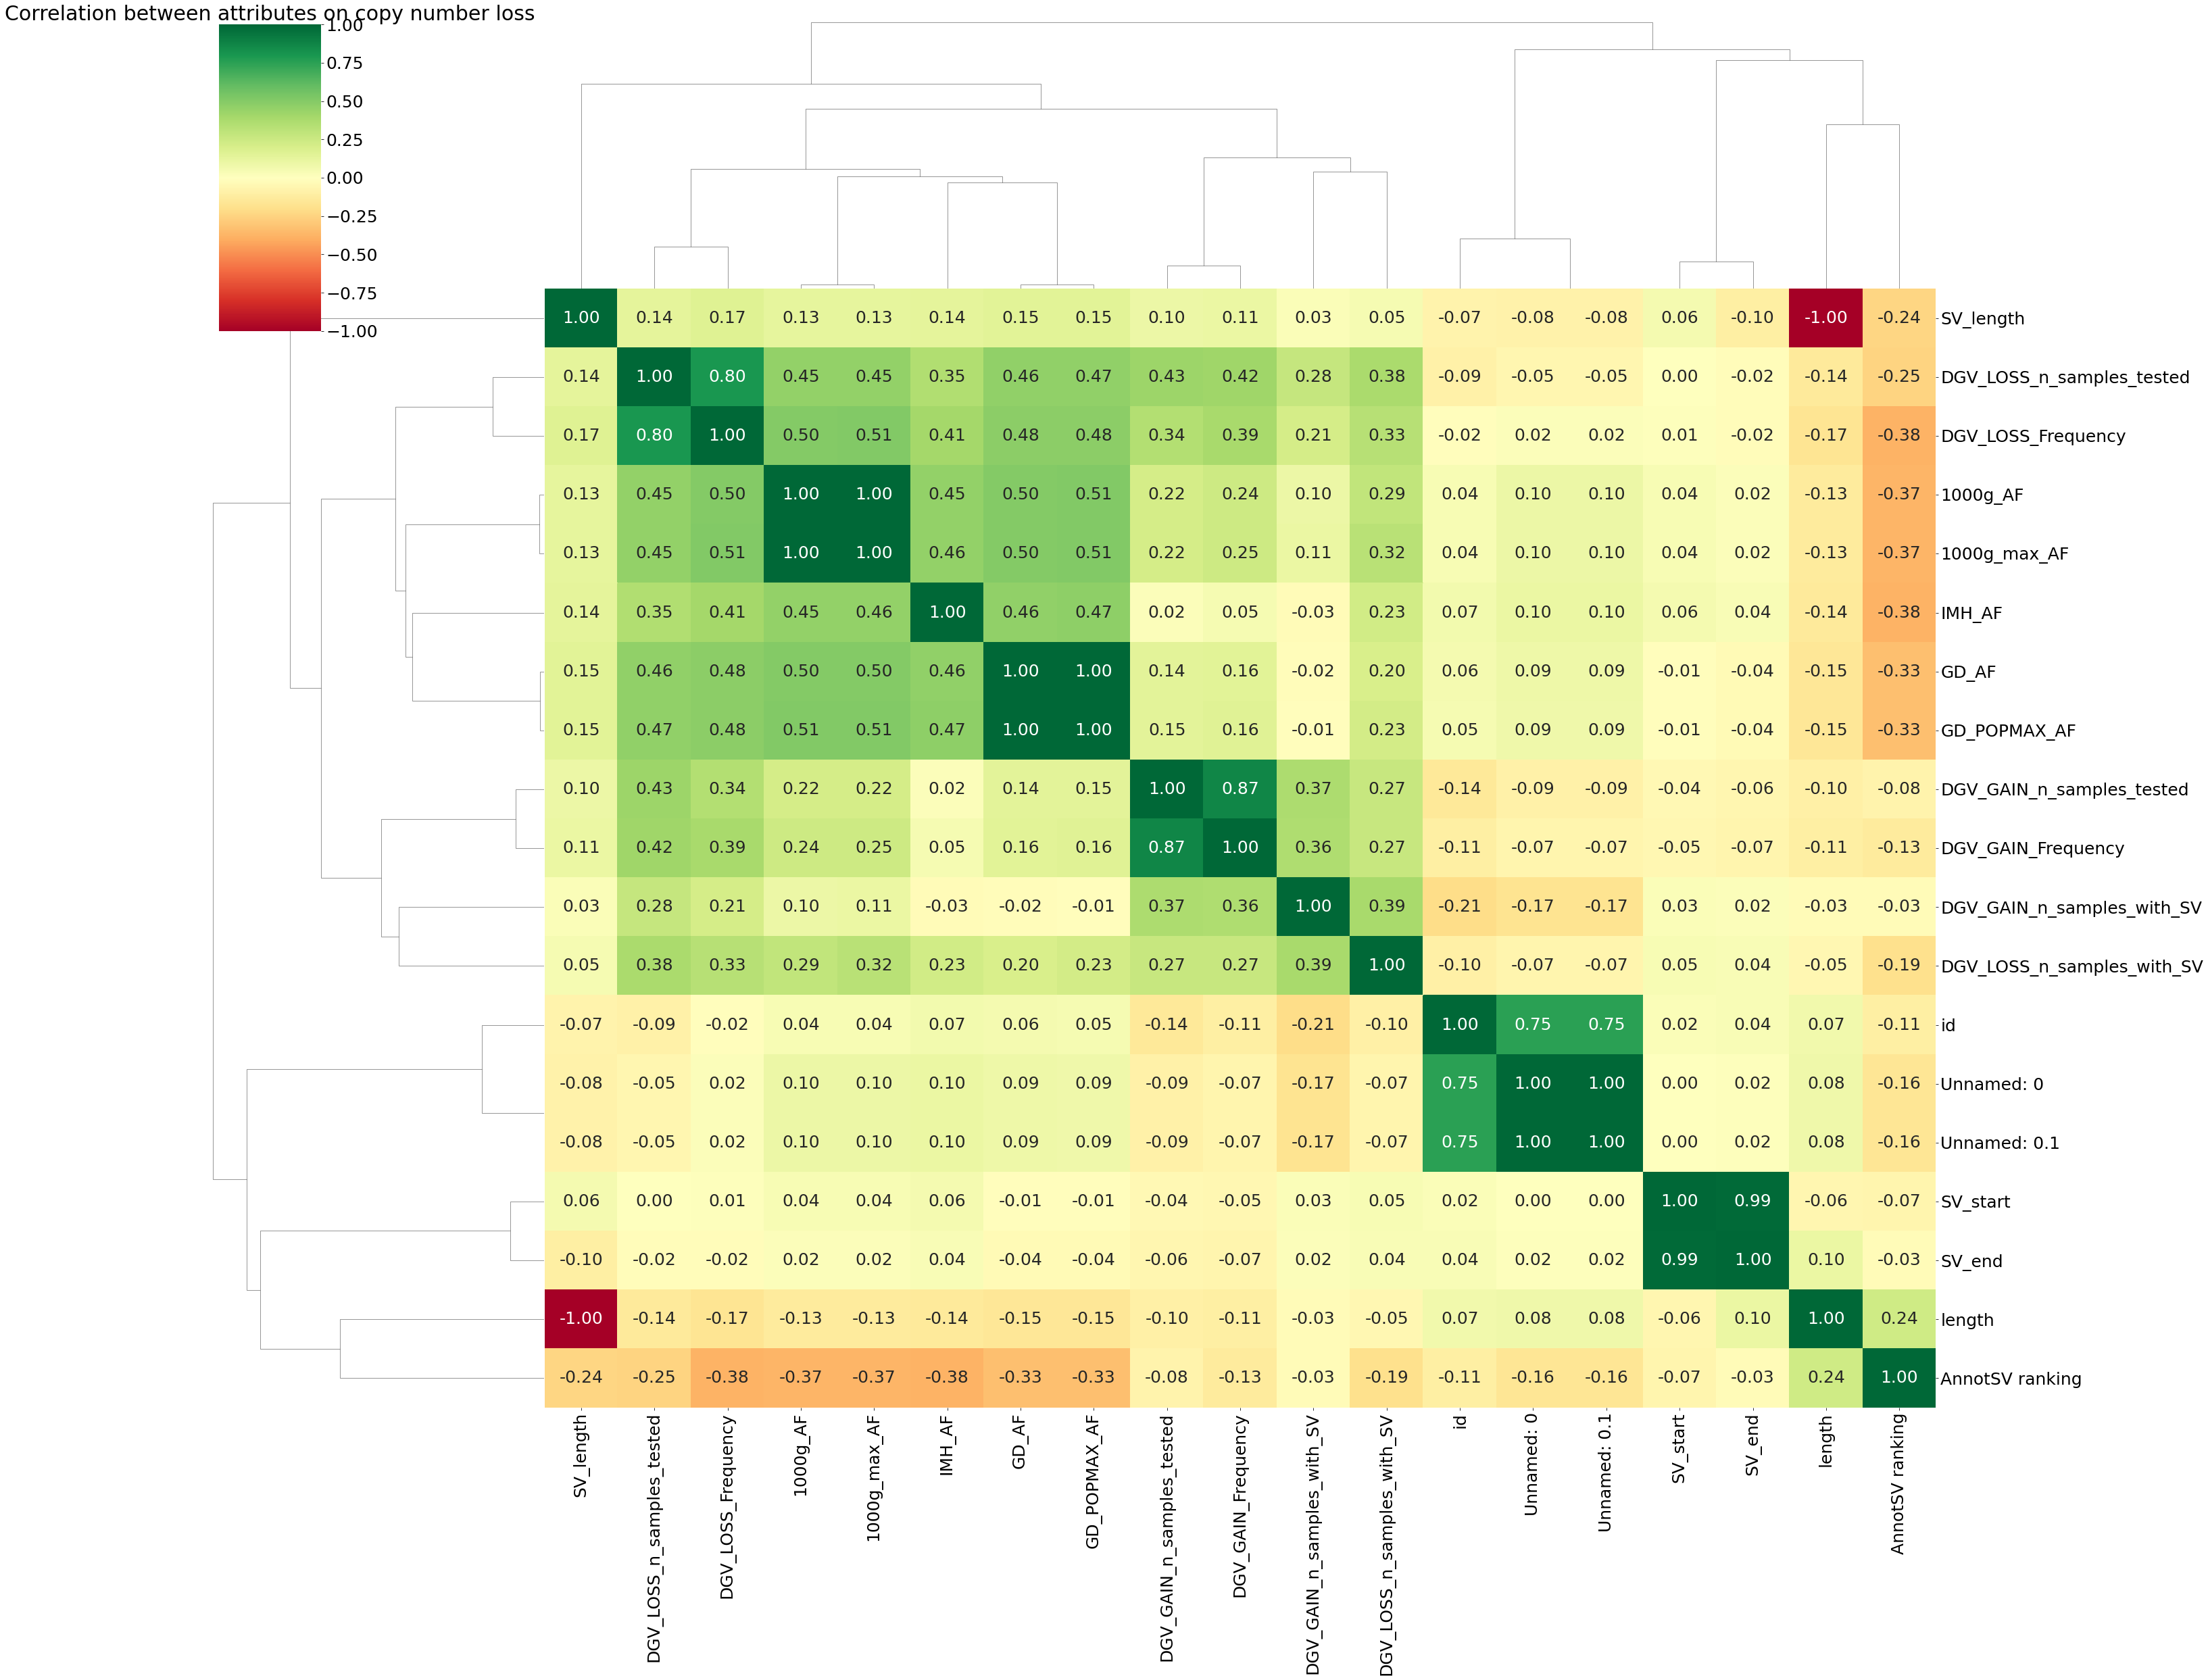

In [29]:
# nepouzite
cnv_types = ['gain', 'loss']
for cnv_type in cnv_types:
    data_train_fn = './data_annotsv/train_val_test_sets/train_val_test_sets_AnnotSV/x_train_' + cnv_type + '.tsv'
    data = pd.read_csv(data_train_fn, sep='\t')
    data_to_correlate = data[ATTRIBUTES]
    data_to_correlate = data_to_correlate.dropna(axis='columns')
    method='pearson' # ‘pearson’, ‘kendall’, ‘spearman’
    korelacie = data_to_correlate.corr(method=method)
    rcParams.update({'font.size': 25})
    fig, ax = plt.subplots(figsize=(115, 115))
    # plt.figure()    
#     res = sns.clustermap(korelacie, cmap="RdYlGn", figsize=(42, 35), annot=True, fmt='.2f', cbar_kws={"shrink": .8}, vmin=-1, vmax=1)
    res = sns.clustermap(korelacie, cmap="RdYlGn", figsize=(42, 35), annot=True, fmt='.2f', cbar_kws={"shrink": .8}, vmin=-1, vmax=1)
    
    plt.setp(ax.get_xticklabels(), rotation=45, ha='right')

    title_text = 'Correlation between attributes on copy number ' + cnv_type
    plt.title(title_text)
    fig.tight_layout()
    fn_to_savefig = './results_isv_annotsv/comparison_attributes_annotsv_full/correlations_attributes/corr_'+ method + '_' + cnv_type +'_clustermap.jpg'
    plt.savefig(fn_to_savefig, dpi=350, format='jpg', bbox_inches = 'tight', facecolor='white')
    plt.show()

Porovnanie zvolenych atributov

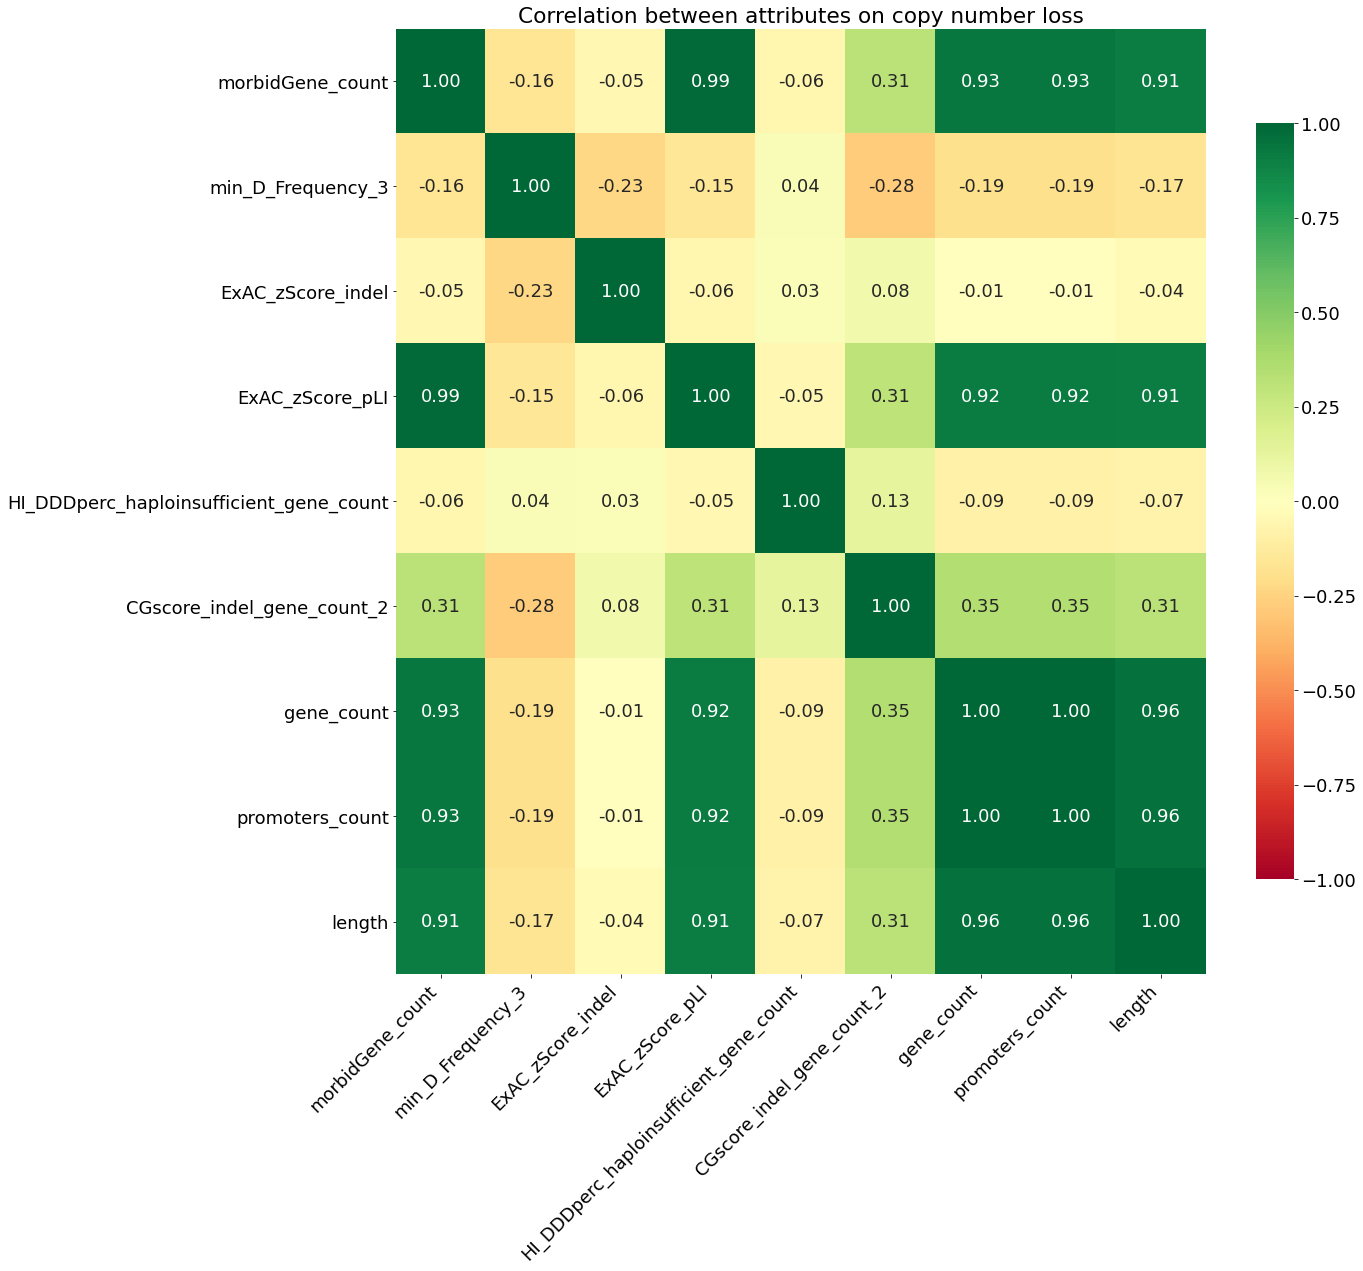

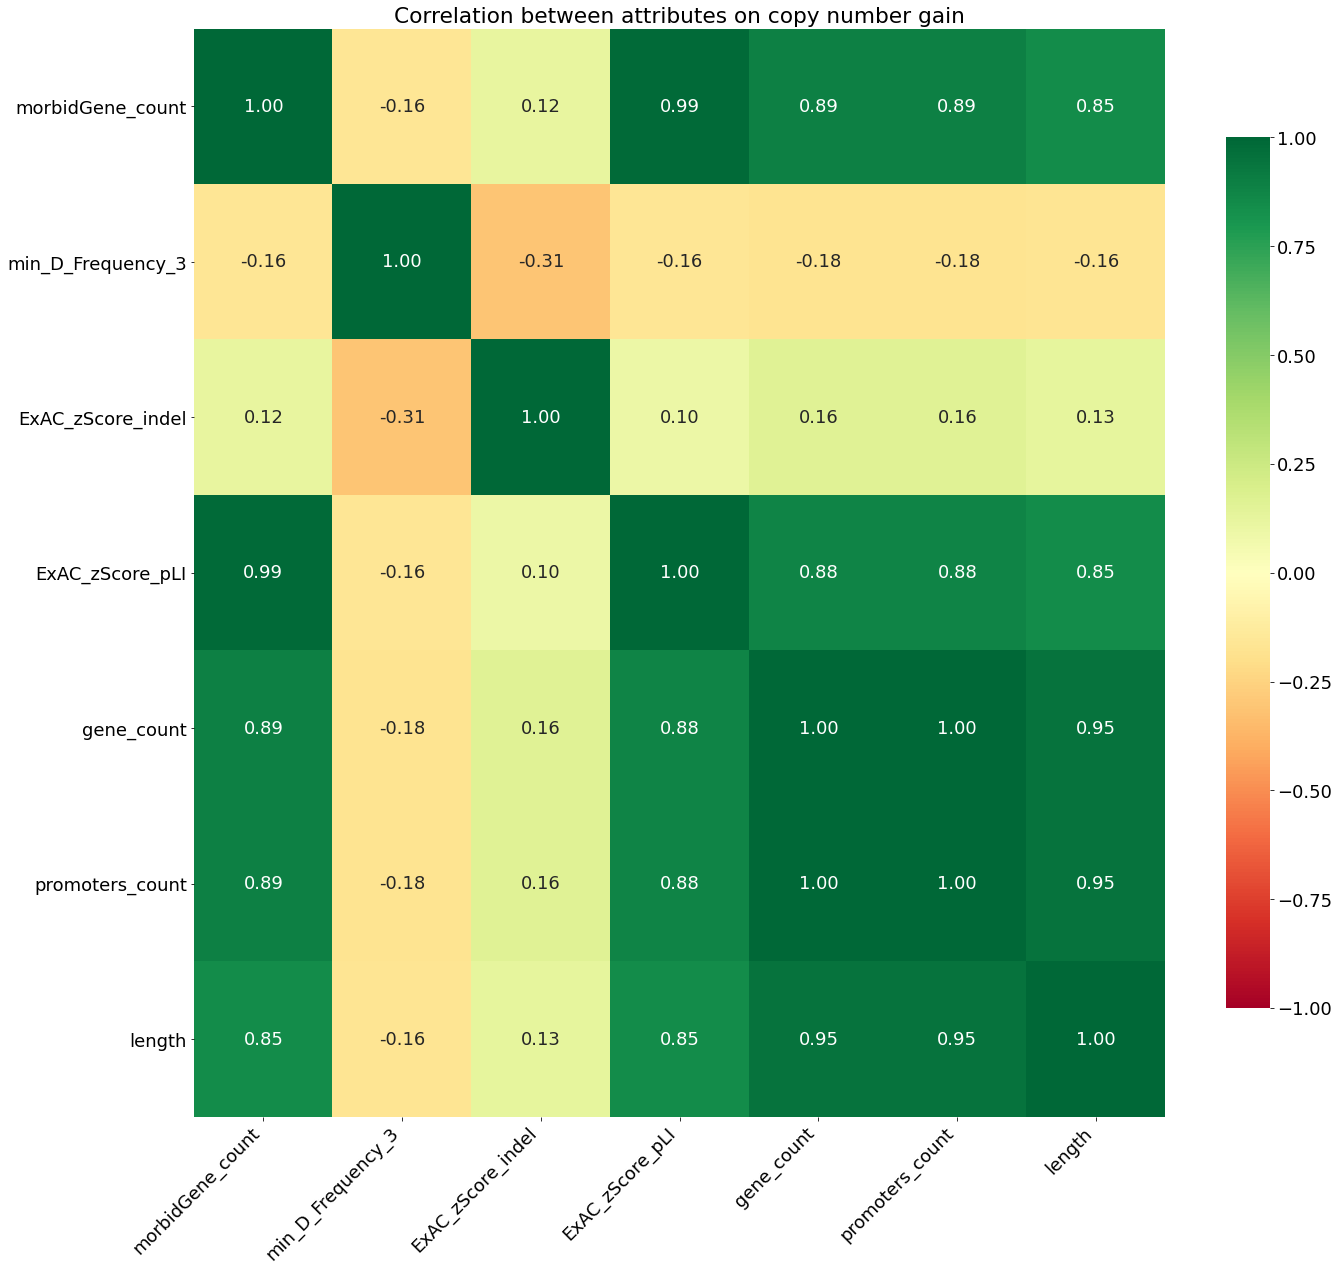

In [37]:
ATTRIBUTES_TO_USE = [
    'morbidGene_count', 
    'min_D_Frequency_3',
    'ExAC_zScore_indel',
    'ExAC_zScore_pLI',
    'HI_DDDperc_haploinsufficient_gene_count',
    'CGscore_indel_gene_count_2', 
    'gene_count',
    'promoters_count',
    'length'
]

cnv_types = ['loss','gain']
for cnv_type in cnv_types:
    data_train_fn = './data_annotsv/train_val_test_sets/train_val_test_sets_AnnotSV/x_train_' + cnv_type + '.tsv'
    data = pd.read_csv(data_train_fn, sep='\t')
    if cnv_type == 'gain':
        ATTRIBUTES_TO_USE.remove('HI_DDDperc_haploinsufficient_gene_count')
        ATTRIBUTES_TO_USE.remove('CGscore_indel_gene_count_2')
    data_to_correlate = data[ATTRIBUTES_TO_USE]
    method='pearson' # ‘pearson’, ‘kendall’, ‘spearman’
    korelacie = data_to_correlate.corr(method=method)
    
    rcParams.update({'font.size': 18})
    fig, ax = plt.subplots(figsize=(20, 18))
    res = sns.heatmap(korelacie, cmap="RdYlGn", annot=True, fmt='.2f',cbar_kws={"shrink": 0.8}, vmin=-1, vmax=1)  #, linewidths=0.05, linecolor='gray')
    plt.setp(ax.get_xticklabels(), rotation=45, ha='right')

    res.set_xticklabels(res.get_xmajorticklabels())
    res.set_yticklabels(res.get_ymajorticklabels())
    title_text = 'Correlation between attributes on copy number ' + cnv_type
    plt.title(title_text)
    fig.tight_layout()
    fn_to_savefig = './results_isv_annotsv/comparison_attributes_annotsv_full/correlations_attributes/corr_'+ method + 'cnv_specific_attributes_used_' + cnv_type +'_heatmap.jpg'
    plt.savefig(fn_to_savefig, dpi=350, format='jpg', bbox_inches = 'tight', facecolor='white')
    plt.show()


In [ ]:
ATTRIBUTES_TO_USE = [
    'morbidGene_count', 
    'min_D_Frequency_3',
    'ExAC_zScore_indel',
    'ExAC_zScore_pLI',
    'HI_DDDperc_haploinsufficient_gene_count',
    'CGscore_indel_gene_count_2', 
    'gene_count',
    'promoters_count',
    'length'
]

cnv_types = ['loss','gain']
for cnv_type in cnv_types:
    data_train_fn = './data_annotsv/train_val_test_sets/train_val_test/x_train_' + cnv_type + '.tsv'
    data = pd.read_csv(data_train_fn, sep='\t')
    if cnv_type == 'gain':
        ATTRIBUTES_TO_USE.remove('HI_DDDperc_haploinsufficient_gene_count')
        ATTRIBUTES_TO_USE.remove('CGscore_indel_gene_count_2')
    data_to_correlate = data[ATTRIBUTES_TO_USE]
    method='pearson' # ‘pearson’, ‘kendall’, ‘spearman’
    korelacie = data_to_correlate.corr(method=method)
    
    rcParams.update({'font.size': 18})
    fig, ax = plt.subplots(figsize=(20, 18))
    res = sns.heatmap(korelacie, cmap="RdYlGn", annot=True, fmt='.2f',cbar_kws={"shrink": 0.8}, vmin=-1, vmax=1)  #, linewidths=0.05, linecolor='gray')
    plt.setp(ax.get_xticklabels(), rotation=45, ha='right')

    res.set_xticklabels(res.get_xmajorticklabels())
    res.set_yticklabels(res.get_ymajorticklabels())
    title_text = 'Correlation between attributes on copy number ' + cnv_type
    plt.title(title_text)
    fig.tight_layout()
    fn_to_savefig = './results_isv_annotsv/comparison_attributes_annotsv_full/correlations_attributes/corr_'+ method + '_attributesToUse_' + cnv_type +'_heatmap.jpg'
    plt.savefig(fn_to_savefig, dpi=350, format='jpg', bbox_inches = 'tight', facecolor='white')
    plt.show()


In [1]:
# vytvorenie tabluky s infi o atributoch

In [24]:

cnv_types = ['loss', 'gain']
for cnv_type in cnv_types:
    data_train_fn = './data_annotsv/train_val_test_sets/train_val_test/x_train_' + cnv_type + '.tsv'
    data = pd.read_csv(data_train_fn, sep='\t', low_memory=False)

    df_info_all = pd.DataFrame()
    i=0
    ATTRIBUTES = list(data.select_dtypes(include=np.number).columns.tolist())
    ATTRIBUTES.remove('clinsig_bin')
    
    for atr in ATTRIBUTES:
        data_to_corr = data[['clinsig_bin', atr]]
        data_to_corr = data_to_corr.dropna()
        if data_to_corr.shape[0] > 0:
            korelacia = stats.pointbiserialr(data_to_corr['clinsig_bin'], data_to_corr[atr]).correlation
            df_benign = data_to_corr[data_to_corr.clinsig_bin == 0]
            df_patho = data_to_corr[data_to_corr.clinsig_bin == 1]
            df_info_all.at[i, 'AttributeName'] = atr
            df_info_all.at[i, 'PointBiserialCoefficient'] = korelacia
            df_info_all.at[i, 'MannWhitneyTest_pval'] = stats.mannwhitneyu(df_benign, df_patho).pvalue
            df_info_all.at[i, 'Min'] = data_to_corr[atr].min()
            df_info_all.at[i, 'Max'] = data_to_corr[atr].max()
            df_info_all.at[i, 'Median'] = data_to_corr[atr].median()
            df_info_all.at[i, 'Mean'] = data_to_corr[atr].mean()            
            i+=1

#     df_info_all = df_info_all.reindex(df_info_all.PointBiserialCoefficient.abs().sort_values(ascending=False).index)

    df_info_all_fn = './results_isv_annotsv/comparison_attributes_annotsv_full/correlations_attributes/correlations_info_train_'+ cnv_type +'.tsv'
    df_info_all.to_csv(df_info_all_fn, sep='\t', index=False)


loss_df_info = pd.read_csv('./results_isv_annotsv/comparison_attributes_annotsv_full/correlations_attributes/correlations_info_train_loss.tsv', sep='\t')
gain_df_info = pd.read_csv('./results_isv_annotsv/comparison_attributes_annotsv_full/correlations_attributes/correlations_info_train_gain.tsv', sep='\t')

loss_df_info['CNV_type'] = 'Copy number loss'
gain_df_info['CNV_type'] = 'Copy number gain'

df_info_all = pd.concat([loss_df_info, gain_df_info])

/home/gaziova/miniconda3/envs/notebookProjects/lib/python3.7/site-packages/scipy/stats/stats.py:3845: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/home/gaziova/miniconda3/envs/notebookProjects/lib/python3.7/site-packages/scipy/stats/stats.py:3845: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/home/gaziova/miniconda3/envs/notebookProjects/lib/python3.7/site-packages/scipy/stats/stats.py:3845: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())


In [25]:
df_info_all

AttributeName  PointBiserialCoefficient  \
0                                  SV_start                 -0.047454   
1                                    SV_end                  0.006065   
2                                 SV_length                 -0.322833   
3                                Unnamed: 0                 -0.213327   
4                              Unnamed: 0.1                 -0.213327   
..                                      ...                       ...   
38  HI_DDDperc_haploinsufficient_gene_count                       NaN   
39                 CGscore_indel_gene_count                       NaN   
40               CGscore_indel_gene_count_2                       NaN   
41                        min_D_Frequency_2                 -0.293992   
42                        min_D_Frequency_3                 -0.293992   

    MannWhitneyTest_pval          Min           Max      Median          Mean  \
0                    0.0      10000.0  2.487039e+08  53278953.5  6.860107e+07   
1                    0.0      27961.0  2.489305e+08  55381946.0  7.107437e+07   
2                    0.0 -159520087.0 -9.990000e+02    -72237.0 -2.473296e+06   
3                    0.0       3042.0  5.424800e+04     38531.5  3.676628e+04   
4                    0.0       3042.0  5.424800e+04     38531.5  3.676628e+04   
..                   ...          ...           ...         ...           ...   
38                   0.0          0.0  0.000000e+00         0.0  0.000000e+00   
39                   0.0          0.0  0.000000e+00         0.0  0.000000e+00   
40                   0.0          0.0  0.000000e+00         0.0  0.000000e+00   
41                   0.0         -1.0  9.830834e-01        -1.0 -6.850360e-01   
42                   0.0         -1.0  9.830834e-01        -1.0 -6.850360e-01   

            CNV_type  
0   Copy number loss  
1   Copy number loss  
2   Copy number loss  
3   Copy number loss  
4   Copy number loss  
..               ...  
38  Copy number gain  
39  Copy number gain  
40  Copy number gain  
41  Copy number gain  
42  Copy number gain  

[86 rows x 8 columns]

In [10]:
df_info_all.to_csv('./results_isv_annotsv/comparison_attributes_annotsv_full/correlations_attributes/correlations_info_train_loss_gain.tsv', sep='\t', index=False)

  agg_filter: a filter function, which takes a (m, n, 3) float array and a dpi value, and returns a (m, n, 3) array
  alpha: float or None
  animated: bool
  backgroundcolor: color
  bbox: dict with properties for `.patches.FancyBboxPatch`
  clip_box: `.Bbox`
  clip_on: bool
  clip_path: Patch or (Path, Transform) or None
  color or c: color
  contains: unknown
  figure: `.Figure`
  fontfamily or family: {FONTNAME, 'serif', 'sans-serif', 'cursive', 'fantasy', 'monospace'}
  fontproperties or font or font_properties: `.font_manager.FontProperties` or `str` or `pathlib.Path`
  fontsize or size: float or {'xx-small', 'x-small', 'small', 'medium', 'large', 'x-large', 'xx-large'}
  fontstretch or stretch: {a numeric value in range 0-1000, 'ultra-condensed', 'extra-condensed', 'condensed', 'semi-condensed', 'normal', 'semi-expanded', 'expanded', 'extra-expanded', 'ultra-expanded'}
  fontstyle or style: {'normal', 'italic', 'oblique'}
  fontvariant or variant: {'normal', 'small-caps'}
  fontw

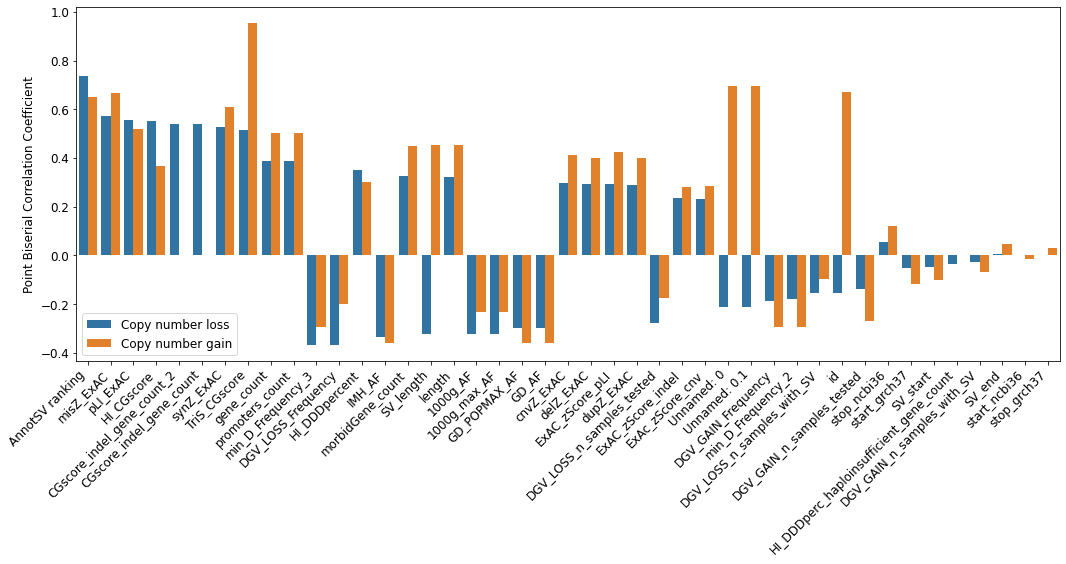

In [12]:
rcParams.update({'font.size': 12})
fig, ax = plt.subplots(figsize=(15, 8))
sns.barplot(x='AttributeName', y='PointBiserialCoefficient', data = df_info_all, hue='CNV_type')
plt.setp(ax.get_xticklabels(), rotation=45, ha='right')
plt.setp(ax.set_xlabel(''))
plt.setp(ax.legend(title=None) )
plt.setp(ax.set_ylabel('Point Biserial Correlation Coefficient'))
fig.tight_layout()
fn_to_savefig = './results_isv_annotsv/comparison_attributes_annotsv_full/correlations_attributes/pointBiserialCorrelation_train_loss_gain_barplot.jpg'
plt.savefig(fn_to_savefig, dpi=350, format='jpg', bbox_inches = 'tight', facecolor='white')
plt.show()

  agg_filter: a filter function, which takes a (m, n, 3) float array and a dpi value, and returns a (m, n, 3) array
  alpha: float or None
  animated: bool
  backgroundcolor: color
  bbox: dict with properties for `.patches.FancyBboxPatch`
  clip_box: `.Bbox`
  clip_on: bool
  clip_path: Patch or (Path, Transform) or None
  color or c: color
  contains: unknown
  figure: `.Figure`
  fontfamily or family: {FONTNAME, 'serif', 'sans-serif', 'cursive', 'fantasy', 'monospace'}
  fontproperties or font or font_properties: `.font_manager.FontProperties` or `str` or `pathlib.Path`
  fontsize or size: float or {'xx-small', 'x-small', 'small', 'medium', 'large', 'x-large', 'xx-large'}
  fontstretch or stretch: {a numeric value in range 0-1000, 'ultra-condensed', 'extra-condensed', 'condensed', 'semi-condensed', 'normal', 'semi-expanded', 'expanded', 'extra-expanded', 'ultra-expanded'}
  fontstyle or style: {'normal', 'italic', 'oblique'}
  fontvariant or variant: {'normal', 'small-caps'}
  fontw

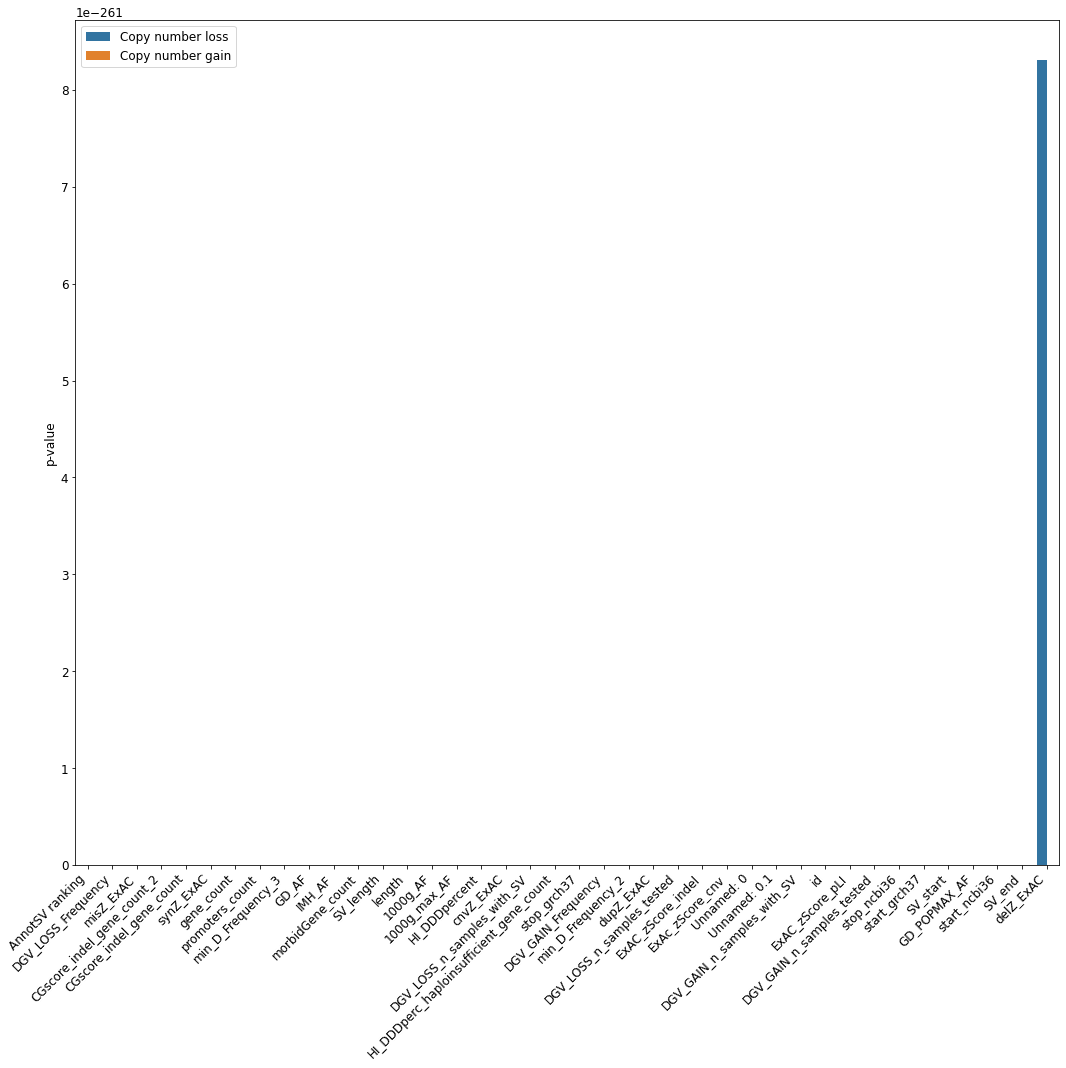

In [23]:
df_info_all = df_info_all.sort_values(by='MannWhitneyTest_pval')
df_info_all = df_info_all[df_info_all.AttributeName != 'pLI_ExAC']
rcParams.update({'font.size': 12})
fig, ax = plt.subplots(figsize=(15, 15))
sns.barplot(x='AttributeName', y='MannWhitneyTest_pval', data = df_info_all, hue='CNV_type')
plt.setp(ax.get_xticklabels(), rotation=45, ha='right')
plt.setp(ax.set_xlabel(''))
plt.setp(ax.legend(title=None) )
plt.setp(ax.set_ylabel('p-value'))
fig.tight_layout()
fn_to_savefig = './results_isv_annotsv/comparison_attributes_annotsv_full/correlations_attributes/mannwhitneyPval_train_loss_gain_barplot.jpg'
plt.savefig(fn_to_savefig, dpi=350, format='jpg', bbox_inches = 'tight', facecolor='white')
plt.show()

# Test normality

In [31]:
cnv_types = ['loss', 'gain']
df_info_all = pd.DataFrame(columns=['AttrinuteName', 'pval_normality', 'cnv_type'])
i=0
for cnv_type in cnv_types:
    data_train_fn = './data_annotsv/train_val_test_sets/train_val_test/x_train_' + cnv_type + '.tsv'
    data = pd.read_csv(data_train_fn, sep='\t', low_memory=False)

    ATTRIBUTES = list(data.select_dtypes(include=np.number).columns.tolist())
    ATTRIBUTES.remove('clinsig_bin')
    
    for atr in ATTRIBUTES:
        p = data[data.clinsig == 'Pathogenic']
        b = data[data.clinsig == 'Benign']
        x = np.concatenate((p[atr], b[atr]))
        k2, pval_normality = stats.normaltest(x)#, nan_policy='omit')
        df_info_all.at[i, 'AttrinuteName'] = atr
        df_info_all.at[i, 'pval_normality'] = pval_normality
        df_info_all.at[i, 'cnv_type'] = cnv_type
        i+=1

In [33]:
df_info_all[df_info_all.pval_normality >= 0.001]

Empty DataFrame
Columns: [AttrinuteName, pval_normality, cnv_type]
Index: []

In [3]:
cnv_types = ['loss', 'gain']
for cnv_type in cnv_types:
    data_train_fn = './data_annotsv/train_val_test_sets/train_val_test/x_train_' + cnv_type + '.tsv'
    data = pd.read_csv(data_train_fn, sep='\t', low_memory=False)

    df_info_all = pd.DataFrame()
    i=0
    ATTRIBUTES = list(data.select_dtypes(include=np.number).columns.tolist())
    ATTRIBUTES.remove('clinsig_bin')
    print(len(ATTRIBUTES))

58
58


In [5]:
df_info_all = pd.read_csv('./results_isv_annotsv/comparison_attributes_annotsv_full/correlations_attributes/correlations_info_train_loss_gain.tsv', sep='\t')


In [7]:
loss = df_info_all[df_info_all.CNV_type == 'Copy number loss']
gain = df_info_all[df_info_all.CNV_type == 'Copy number gain']

In [12]:
gain[gain.MannWhitneyTest_pval <= 0.001].shape

(42, 8)